In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = "1-A1WWZEo_NUOp3-uxU8in5Z1e0vw6ucn"

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_data')  

In [ ]:
test_data = pd.read_pickle("test_data")

In [ ]:
test_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,lemmatized_comment,lemmatized_parent_comment,clean_comment,clean_parent_comment,lemmatized_clean_comment,lemmatized_clean_parent_comment,vectorized_comment,vectorized_clean_comment,vectorized_parent_comment,vectorized_clean_parent_comment,dirty_cosine_similarity,clean_cosine_similarity,word_count,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count,partial_capital_word_count,emoticon_count,sentiment
794682,1,Racist comments are really rare on the interne...,Targash,news,6.0,6.0,0.0,2014-06,11/6/14 16:02,"perhaps it is your bias dear redditor, and non...",Racist comment really rare internet 's clearly...,"perhaps bias dear redditor , none .",Racist comments are really rare on the interne...,perhaps it is your bias dear redditor and none...,Racist comment really rare internet clearly re...,perhaps bias dear redditor none,"[-0.2260461, -0.5411476, -0.5956079, 1.6732603...","[-0.5515428, -0.59989977, 0.069325216, 1.59275...","[-0.24906166, -0.65218884, 0.12795807, 0.64601...","[-0.33440658, -0.508268, 0.3577558, 0.4706608,...",0.250085,0.188576,27,2,0,0,0,0,0,0,0,0,0,neg
1003517,0,"yes, if good taste is what a cock doodle shoul...",superfusion1,sex,8.0,8.0,0.0,2011-01,19/1/11 15:32,That's the most tasteful video I have ever see...,"yes , good taste cock doodle , let cock doodle .",That 's tasteful video I ever see cock doodle .,yes if good taste is what a cock doodle should...,Thats the most tasteful video I have ever seen...,yes good taste cock doodle let cock doodle,Thats tasteful video I ever see cock doodle,"[-0.7737616, 0.4774656, 0.13742262, 0.18524809...","[-0.76534796, 0.46344534, -0.03482504, -0.1605...","[-0.19669841, 0.023759527, 0.39963058, -0.1046...","[-0.32654247, 0.2684772, 0.13918118, 0.0023651...",0.249204,0.183911,18,3,0,0,0,0,0,0,0,0,0,pos
526207,1,Totally not photoshopped...,RB30DETT,funny,11.0,11.0,0.0,2015-12,11/12/15 17:29,London Underground,Totally photoshopped ...,London Underground,Totally not photoshopped,London Underground,Totally photoshopped,London Underground,"[-0.14899243, -0.19366069, -0.20084605, 0.6875...","[-0.11780262, -0.2061242, 0.010147771, 0.53536...","[0.20910913, -0.055749796, 0.017575901, 0.4827...","[0.11732921, -0.14933924, 0.042169612, 0.49933...",0.760832,0.762000,3,3,0,0,0,1,0,0,0,0,0,neu
169751,1,"No, there's too much sexism in those industrie...",randomcombination102,TumblrInAction,50.0,-1.0,-1.0,2016-12,18/12/16 2:17,"Yeah, it's much easier to bitch about male pri...","No , 's much sexism industry make dangerous wo...","Yeah , 's much easy bitch male privilege inter...",No theres too much sexism in those industries ...,Yeah its much easier to bitch about male privi...,No there much sexism industry make dangerous w...,Yeah much easy bitch male privilege internet l...,"[0.24865268, 0.7403738, 0.05449423, 0.81168157...","[0.31113982, 1.0847201, 0.07776833, 0.32138768...","[-0.6251248, -0.3786881, 0.0020529833, 1.26597...","[-0.52135706, -0.47163898, -0.053898532, 1.226...",0.222351,0.213574,18,3,0,0,0,0,0,0,0,0,0,neg
585774,0,Maybe they should take a leaf from the lending...,MemorableYetUnique,unitedkingdom,1.0,1.0,0.0,2015-10,19/10/15 20:15,It's because they specifically want to offer l...,Maybe take leaf lending industry 's playbook o...,It 's specifically want offer loss-making ( bo...,Maybe they should take a leaf from the lending...,Its because they specifically want to offer lo...,Maybe take leaf lending industry playbook offe...,Its specifically want offer lossmaking bookie ...,"[0.022282721, 0.008266672, 0.74342155, 0.85941...","[0.8069845, 0.17959124, 0.5259561, 1.3175151, ...","[-1.6010864, 1.8231604, -0.28390932, 0.6216357...","[-2.014457, 2.110243, -0.8449971, 1.1744075, 0...",0.192439,0.108372,21,9,0,0,0,1,0,0,0,1,0,neu


In [ ]:
id = "1DJ2DG96BKcI3Fuz7o2wMIf-M3W7UXn1Z"

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('base_pred')  

In [ ]:
with open('base_pred', 'rb') as f:
    base_pred = np.load(f)

In [ ]:
id = '15qCQkoU1ucHIhZ_undWeU71a4CFWCpkO'

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('feature_pred')  

In [ ]:
with open('feature_pred', 'rb') as f:
    feature_pred = np.load(f)

In [ ]:
id = '1o7JM3oaK1wn_Wh4kmidC0yQ04B9G70ut'

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('hyper_pred')  

In [ ]:
with open('hyper_pred', 'rb') as f:
    hyper_pred = np.load(f)

In [ ]:
test_data['base_pred'] = base_pred
test_data['feature_pred'] = feature_pred
test_data['hyper_pred'] = hyper_pred

In [ ]:
len(test_data[(test_data['base_pred']==test_data['label'])])/len(test_data)

0.5980184600773621

In [ ]:
len(test_data[(test_data['feature_pred']==test_data['label'])])/len(test_data)

0.6147027690116044

In [ ]:
len(test_data[(test_data['hyper_pred']==test_data['label'])])/len(test_data)

0.6237003254751046

# Analysis from base pred to feature pred

In [ ]:
feature_pred_improve = test_data[(test_data['base_pred']!=test_data['label']) & (test_data['feature_pred']==test_data['label'])] # 22445 predicted correctly after using features

In [ ]:
feature_pred_worse = test_data[(test_data['base_pred']==test_data['label']) & (test_data['feature_pred']!=test_data['label'])]  # 19072 predicted wrongly after using features

In [ ]:
feature_pred_worse

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,lemmatized_comment,lemmatized_parent_comment,clean_comment,clean_parent_comment,lemmatized_clean_comment,lemmatized_clean_parent_comment,vectorized_comment,vectorized_clean_comment,vectorized_parent_comment,vectorized_clean_parent_comment,dirty_cosine_similarity,clean_cosine_similarity,word_count,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count,partial_capital_word_count,emoticon_count,sentiment,base_pred,feature_pred,hyper_pred
794682,1,Racist comments are really rare on the interne...,Targash,news,6.0,6.0,0.0,2014-06,11/6/14 16:02,"perhaps it is your bias dear redditor, and non...",Racist comment really rare internet 's clearly...,"perhaps bias dear redditor , none .",Racist comments are really rare on the interne...,perhaps it is your bias dear redditor and none...,Racist comment really rare internet clearly re...,perhaps bias dear redditor none,"[-0.2260461, -0.5411476, -0.5956079, 1.6732603...","[-0.5515428, -0.59989977, 0.069325216, 1.59275...","[-0.24906166, -0.65218884, 0.12795807, 0.64601...","[-0.33440658, -0.508268, 0.3577558, 0.4706608,...",0.250085,0.188576,27,2,0,0,0,0,0,0,0,0,0,neg,1,0,1
1003517,0,"yes, if good taste is what a cock doodle shoul...",superfusion1,sex,8.0,8.0,0.0,2011-01,19/1/11 15:32,That's the most tasteful video I have ever see...,"yes , good taste cock doodle , let cock doodle .",That 's tasteful video I ever see cock doodle .,yes if good taste is what a cock doodle should...,Thats the most tasteful video I have ever seen...,yes good taste cock doodle let cock doodle,Thats tasteful video I ever see cock doodle,"[-0.7737616, 0.4774656, 0.13742262, 0.18524809...","[-0.76534796, 0.46344534, -0.03482504, -0.1605...","[-0.19669841, 0.023759527, 0.39963058, -0.1046...","[-0.32654247, 0.2684772, 0.13918118, 0.0023651...",0.249204,0.183911,18,3,0,0,0,0,0,0,0,0,0,pos,0,1,0
169751,1,"No, there's too much sexism in those industrie...",randomcombination102,TumblrInAction,50.0,-1.0,-1.0,2016-12,18/12/16 2:17,"Yeah, it's much easier to bitch about male pri...","No , 's much sexism industry make dangerous wo...","Yeah , 's much easy bitch male privilege inter...",No theres too much sexism in those industries ...,Yeah its much easier to bitch about male privi...,No there much sexism industry make dangerous w...,Yeah much easy bitch male privilege internet l...,"[0.24865268, 0.7403738, 0.05449423, 0.81168157...","[0.31113982, 1.0847201, 0.07776833, 0.32138768...","[-0.6251248, -0.3786881, 0.0020529833, 1.26597...","[-0.52135706, -0.47163898, -0.053898532, 1.226...",0.222351,0.213574,18,3,0,0,0,0,0,0,0,0,0,neg,1,0,1
521824,1,"k, im not talented in arts anyway :o",Zyklopi,GlobalOffensive,0.0,0.0,0.0,2015-07,2/7/15 10:12,Do not apply to any art schools while you stil...,"k , im talented art anyway :",Do apply art school still anger issue . That .,k im not talented in arts anyway,Do not apply to any art schools while you stil...,k im talented art anyway,Do apply art school still anger issue That,"[0.13765371, -0.5781274, 0.23657815, 0.1134842...","[0.13183215, -0.27573738, 0.1306485, 0.3750559...","[0.07697068, -0.25921872, 0.12750992, 0.356124...","[0.11826631, -0.31216016, 0.2519824, 0.2653959...",0.057081,0.090187,8,2,0,0,0,0,0,0,0,0,1,neg,1,0,0
965784,1,"Well, it's safer that way, you don't want to r...",pdmcmahon,PreggoPorn,1.0,1.0,0.0,2012-09,15/9/12 6:40,In the out door,"Well , 's safe way , n't want run risk acciden...",In door,Well its safer that way you dont want to run t...,In the out door,Well safer way dont want run risk accidental p...,In door,"[-0.08857848, -0.45011595, -0.103402704, 0.731...","[-0.65018606, -0.20693326, -0.010648503, 0.084...","[-0.38120297, -0.25320905, 0.302915, 0.5152026...","[-0.014306593, -0.25672677, 0.29272112, 0.4775...",0.395148,0.381981,16,5,0,0,0,0,0,0,0,0,0,pos,1,0,0
...,...,...,...,...,...,...,...,.

In [ ]:
counts =['word_count',
       'punctuation_count', 'has_repeated', 'exclaim_count', 'qns_mark_count',
       'ellipses_mark_count', 'interjection_count', 'laughter_words_count',
       'capitalized_word_count', 'partial_capital_word_count',
       'emoticon_count','dirty_cosine_similarity']

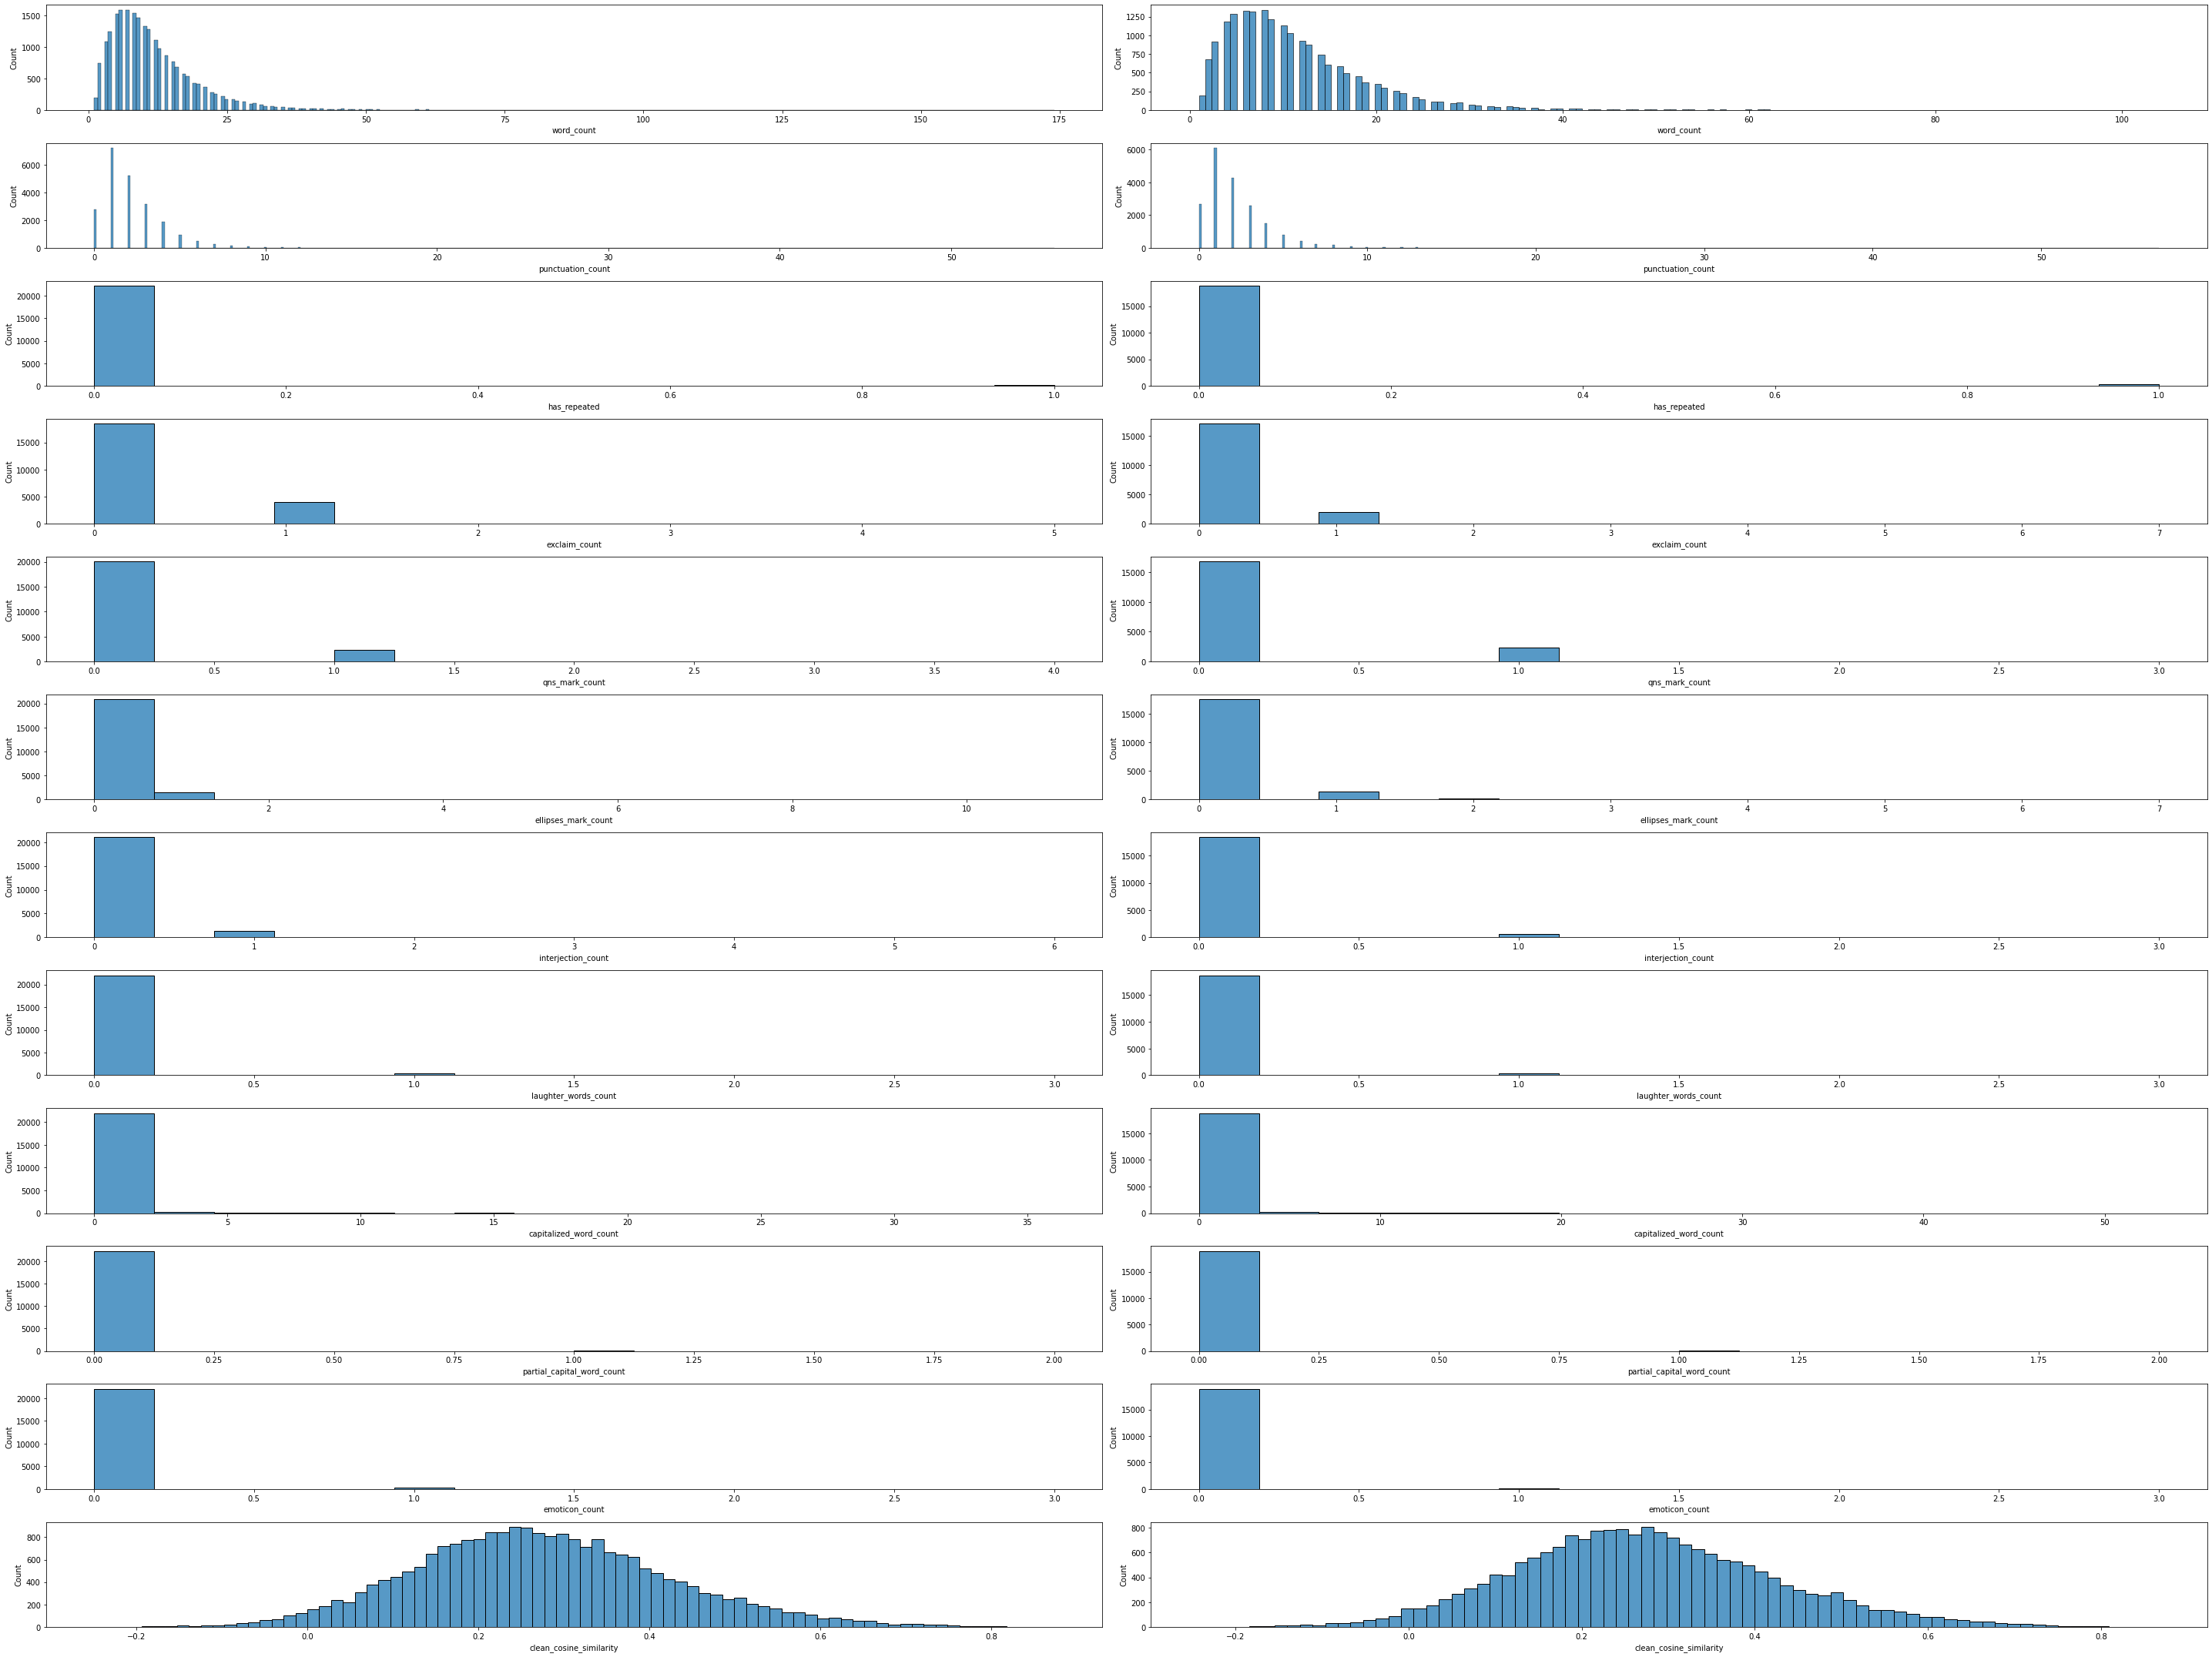

In [ ]:
plt.figure(figsize=(40,30))
k=1
for i in counts:
  plt.subplot(12,2,k)
  sns.histplot(x=feature_pred_improve[i])
  
  plt.subplot(12,2,k+1)
  sns.histplot(x=feature_pred_worse[i])
  k+=2
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 100.0)]

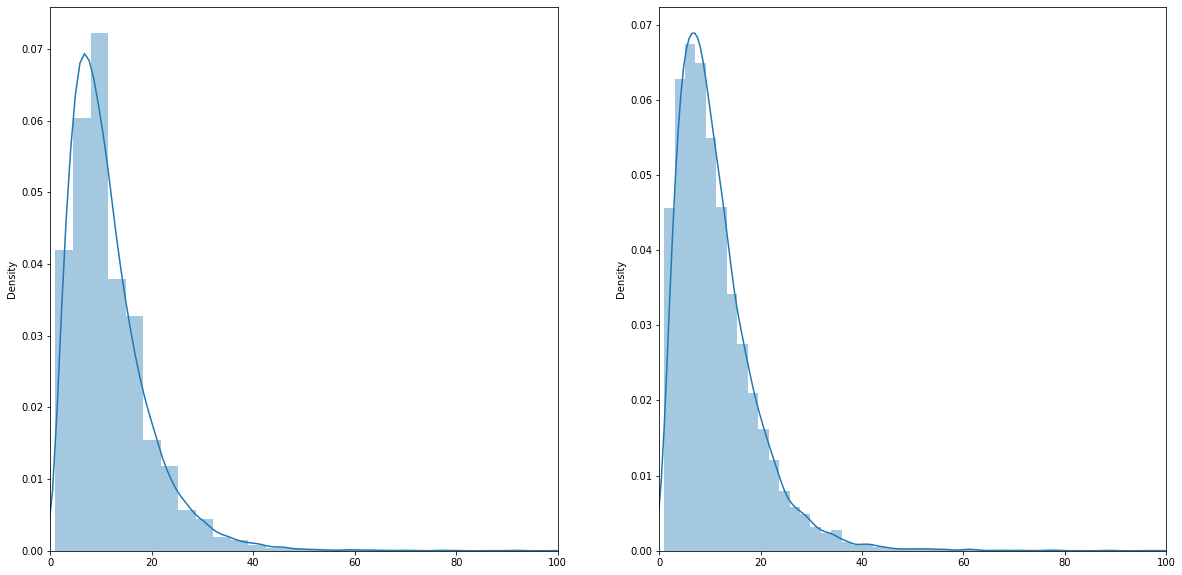

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=100)
a = sns.distplot(ax=axes[0], x=feature_pred_improve['word_count'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['word_count'])
a.set(xlim=(0, 100))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 10.0)]

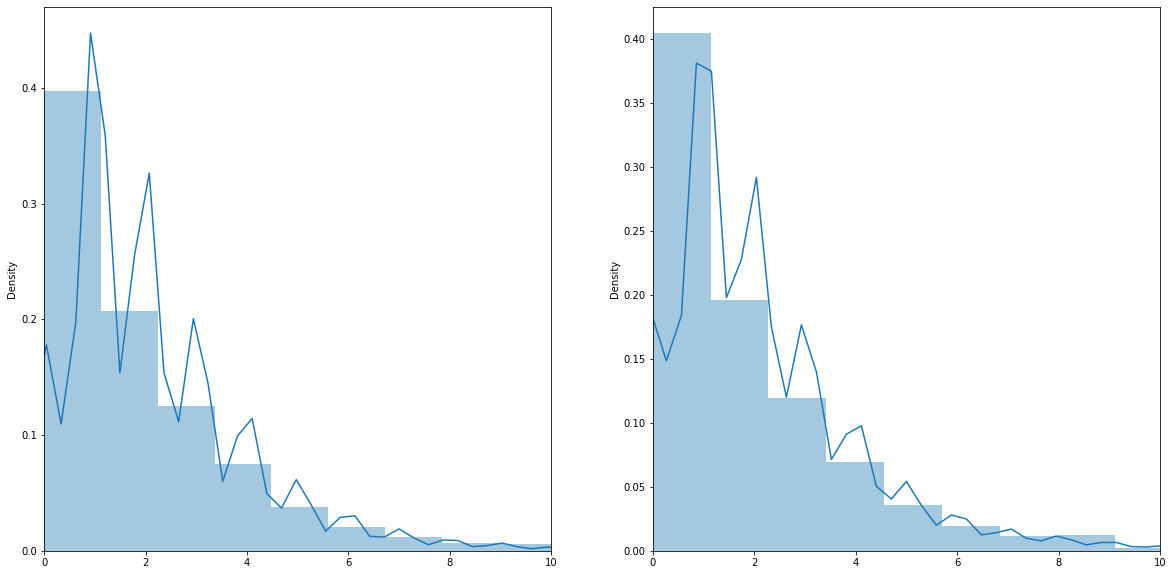

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=10)
a = sns.distplot(ax=axes[0], x=feature_pred_improve['punctuation_count'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['punctuation_count'])
a.set(xlim=(0, 10))

For the right side, for each punctuation count, the density has more variance.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 1.0)]

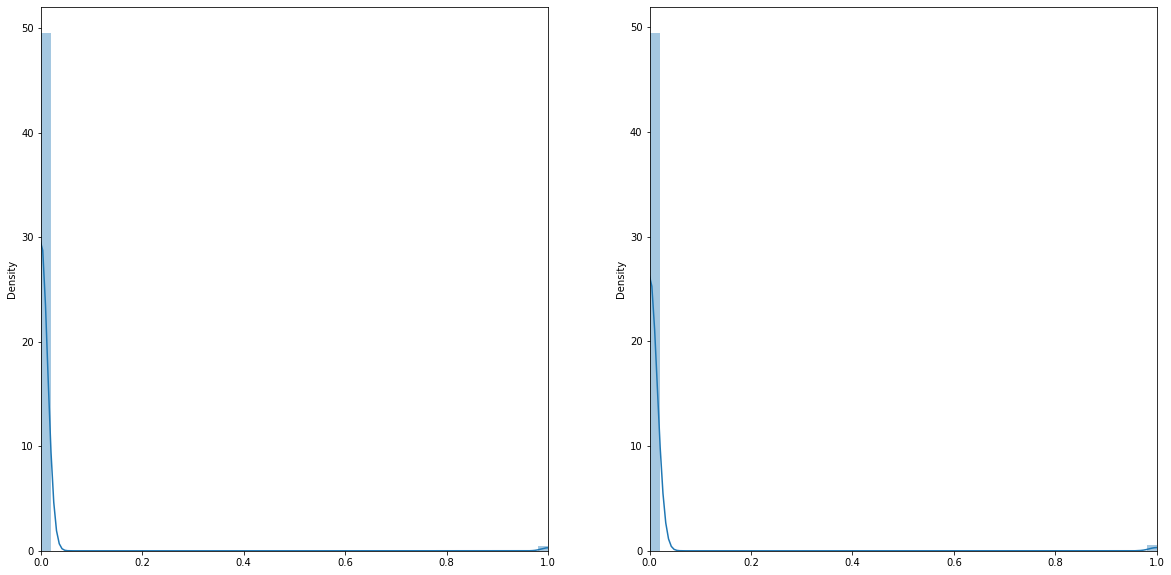

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=1)
a = sns.distplot(ax=axes[0], x=feature_pred_improve['has_repeated'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['has_repeated'])
a.set(xlim=(0, 1))

[(0.0, 2.0)]

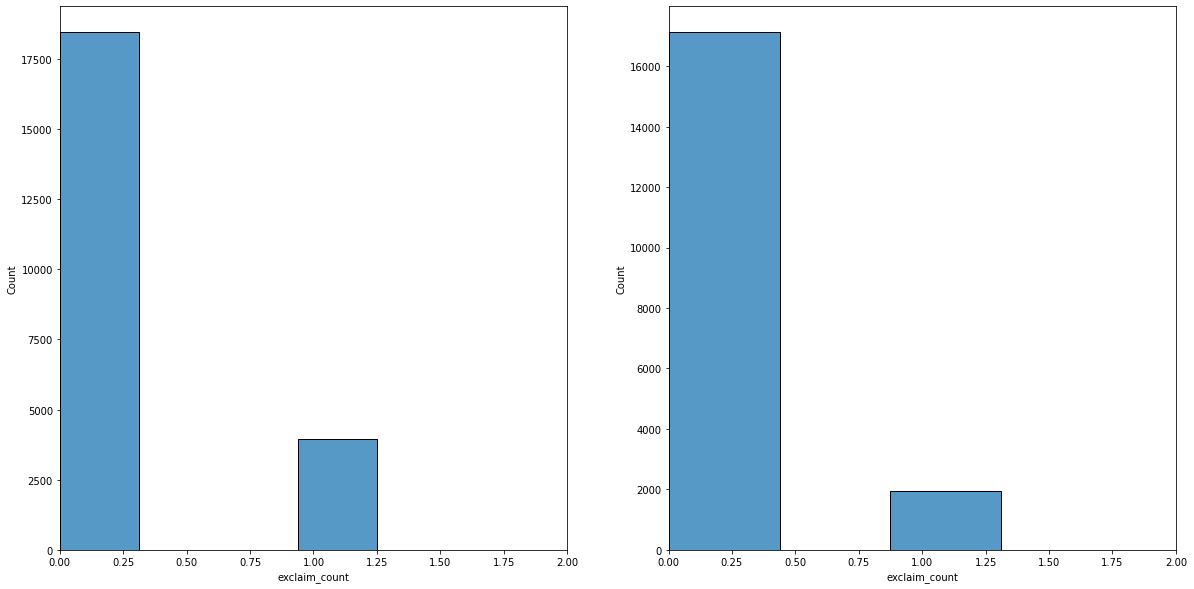

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.histplot(ax=axes[0], x=feature_pred_improve['exclaim_count'])
b = sns.histplot(ax=axes[1], x=feature_pred_worse['exclaim_count'])
a.set(xlim=(0, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 2.0)]

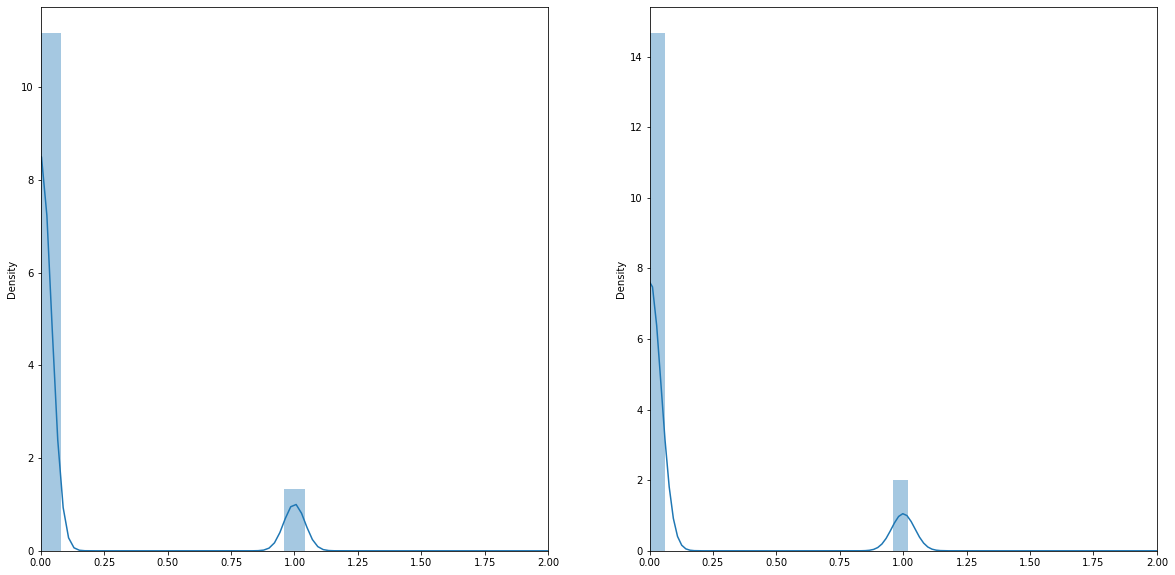

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.distplot(ax=axes[0], x=feature_pred_improve['qns_mark_count'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['qns_mark_count'])
a.set(xlim=(0, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 4.0)]

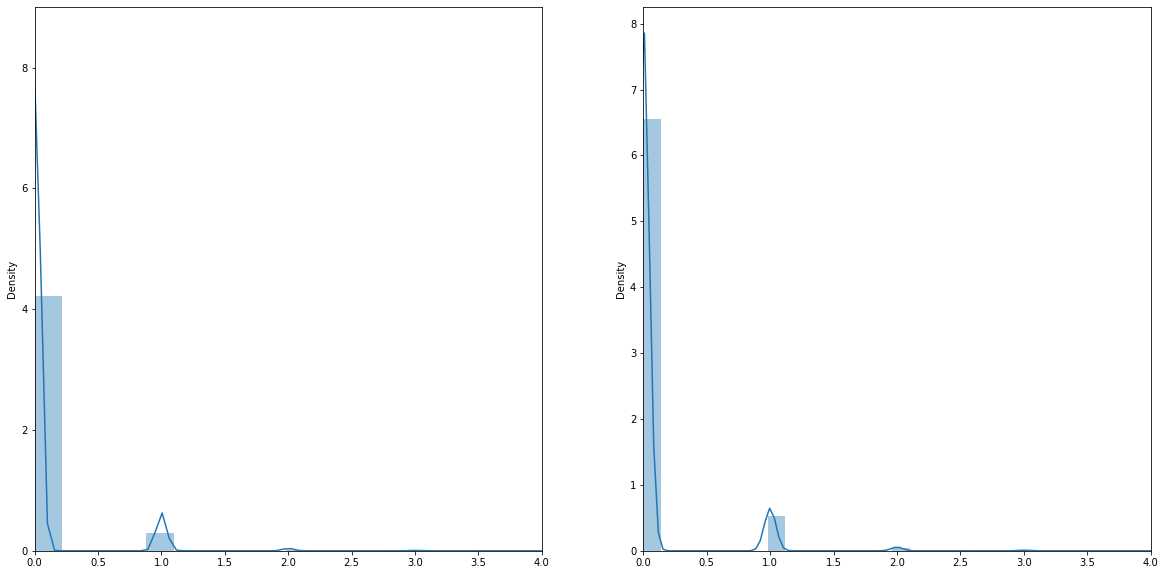

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=4)
a = sns.distplot(ax=axes[0], x=feature_pred_improve['ellipses_mark_count'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['ellipses_mark_count'])
a.set(xlim=(0, 4))

[(0.0, 2.0)]

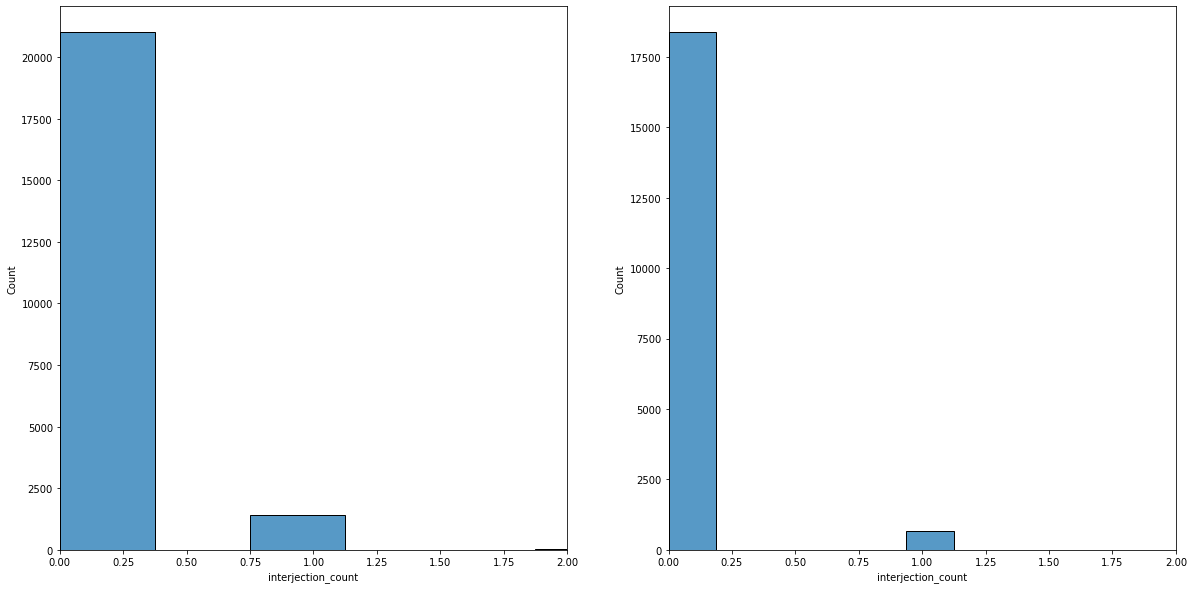

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.histplot(ax=axes[0], x=feature_pred_improve['interjection_count'])
b = sns.histplot(ax=axes[1], x=feature_pred_worse['interjection_count'])
a.set(xlim=(0, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 2.0)]

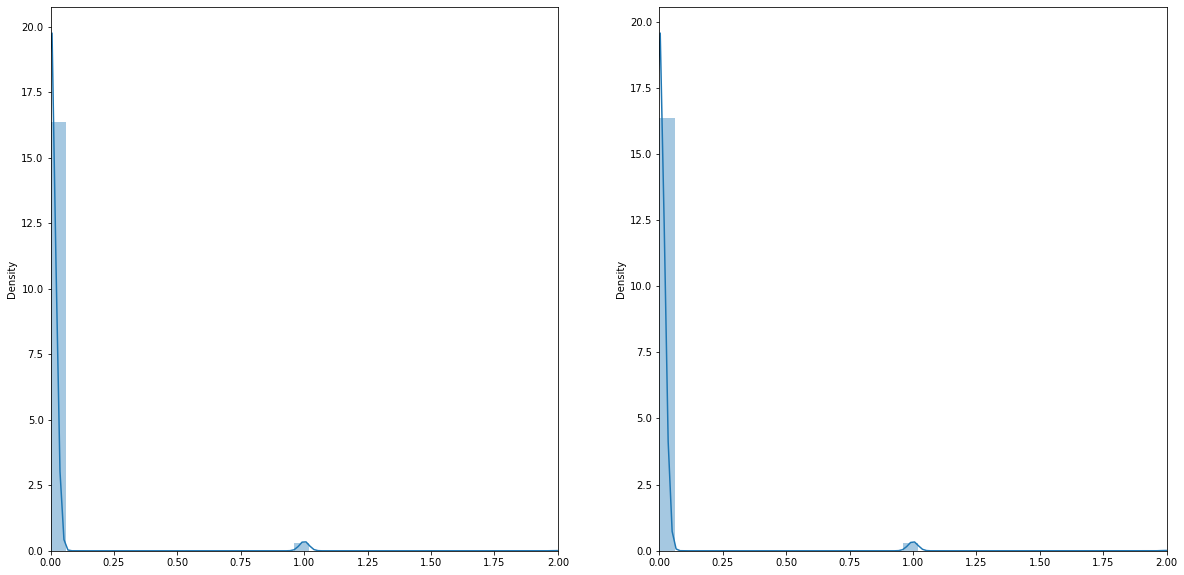

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.distplot(ax=axes[0], x=feature_pred_improve['laughter_words_count'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['laughter_words_count'])
a.set(xlim=(0, 2))

[(0.0, 25.0)]

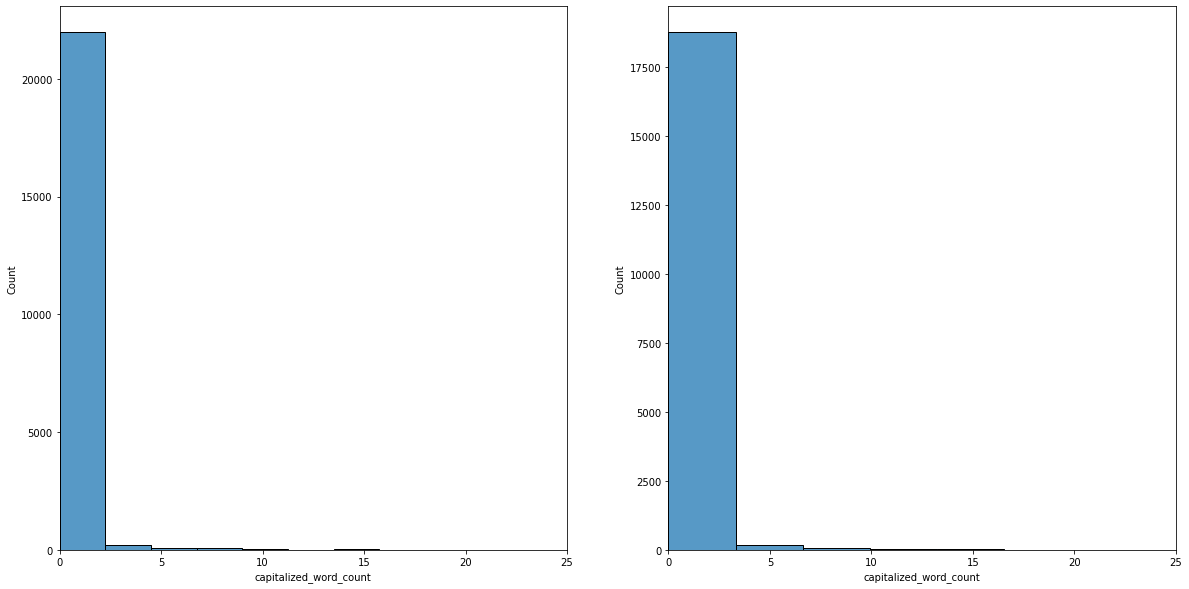

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=25)
a = sns.histplot(ax=axes[0], x=feature_pred_improve['capitalized_word_count'])
b = sns.histplot(ax=axes[1], x=feature_pred_worse['capitalized_word_count'])
a.set(xlim=(0, 25))

(0.0, 10.0)

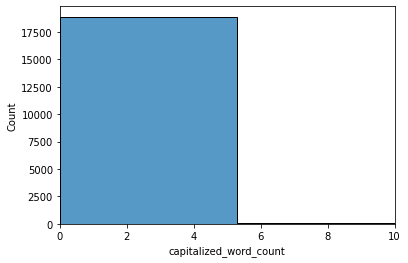

In [ ]:
sns.histplot(feature_pred_worse['capitalized_word_count'],bins=10)
plt.xlim(0,10)

[(0.0, 2.0)]

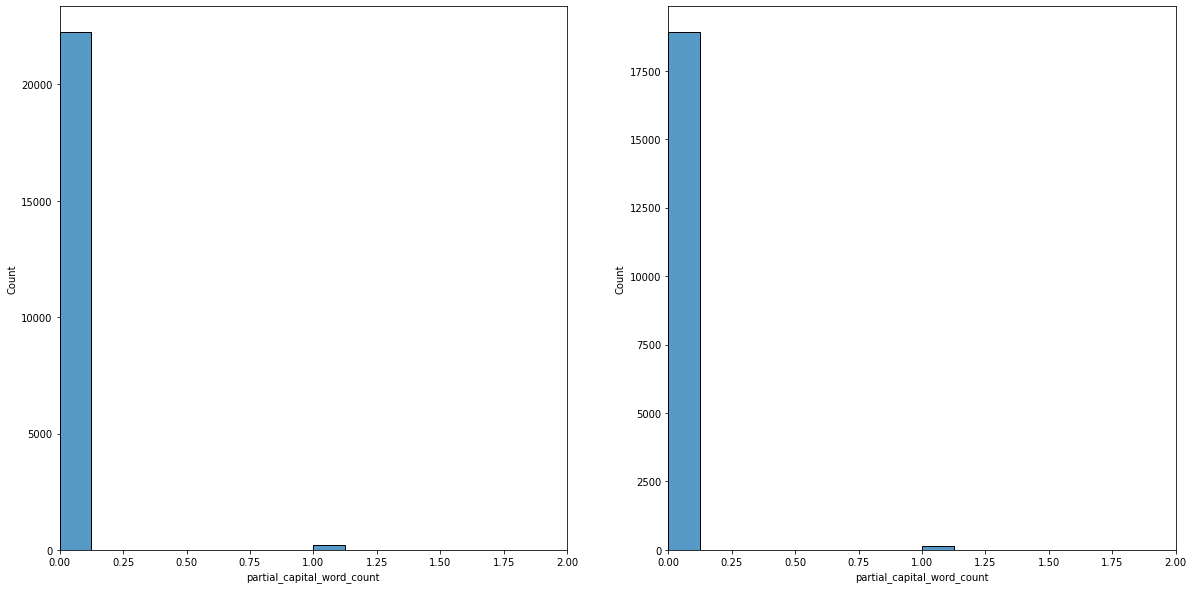

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.histplot(ax=axes[0], x=feature_pred_improve['partial_capital_word_count'])
b = sns.histplot(ax=axes[1], x=feature_pred_worse['partial_capital_word_count'])
a.set(xlim=(0, 2))

[(0.0, 2.0)]

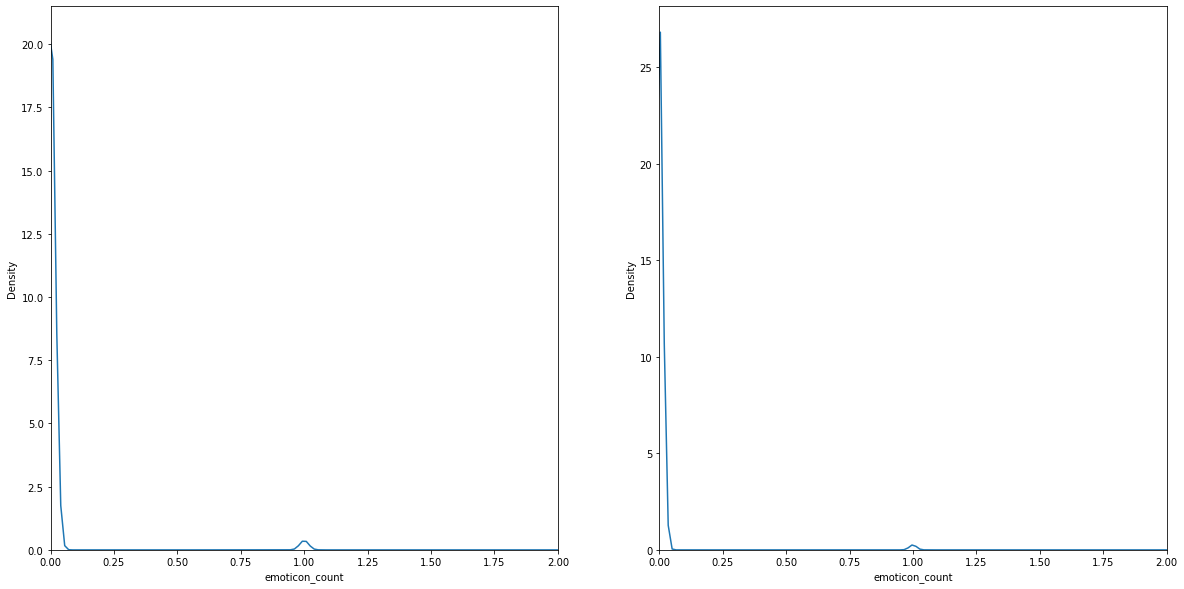

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.kdeplot(ax=axes[0], x=feature_pred_improve['emoticon_count'])
b = sns.kdeplot(ax=axes[1], x=feature_pred_worse['emoticon_count'])
a.set(xlim=(0, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


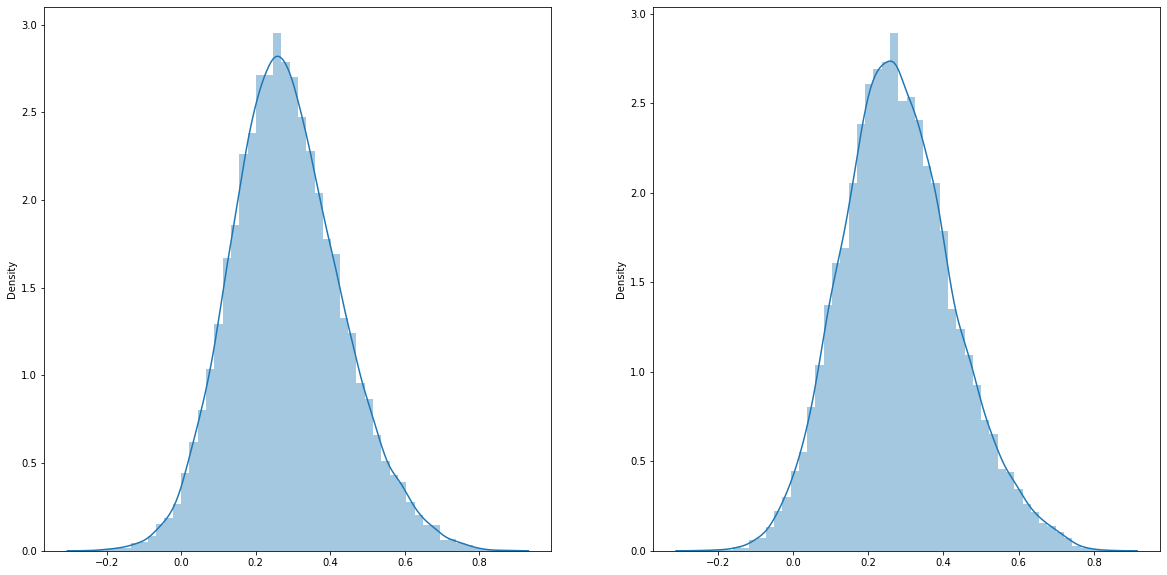

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
a = sns.distplot(ax=axes[0], x=feature_pred_improve['dirty_cosine_similarity'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['dirty_cosine_similarity'])

In [ ]:
feature_pred_worse['dirty_cosine_similarity'].describe()

count    19072.000000
mean         0.281382
std          0.149152
min         -0.248203
25%          0.179339
50%          0.272920
75%          0.375752
max          0.852873
Name: dirty_cosine_similarity, dtype: float64

In [ ]:
feature_pred_improve['dirty_cosine_similarity'].describe()

count    22445.000000
mean         0.283214
std          0.147303
min         -0.246124
25%          0.182367
50%          0.274360
75%          0.376324
max          0.871814
Name: dirty_cosine_similarity, dtype: float64

The left side the max cosine similarity <1, which means after using the other features for the model, the model predicts better for comments that are more different form parent comments


# From feature pred to hyper pred


In [ ]:
hyper_pred_improve = test_data[(test_data['feature_pred']!=test_data['label']) & (test_data['hyper_pred']==test_data['label'])] # 6386 predicted correctly after tuning

In [ ]:
hyper_pred_worse = test_data[(test_data['feature_pred']==test_data['label']) & (test_data['hyper_pred']!=test_data['label'])]  # 5160 predicted wrongly after using features

In [ ]:
counts =['word_count',
       'punctuation_count', 'has_repeated', 'exclaim_count', 'qns_mark_count',
       'ellipses_mark_count', 'interjection_count', 'laughter_words_count',
       'capitalized_word_count', 'partial_capital_word_count',
       'emoticon_count','dirty_cosine_similarity']

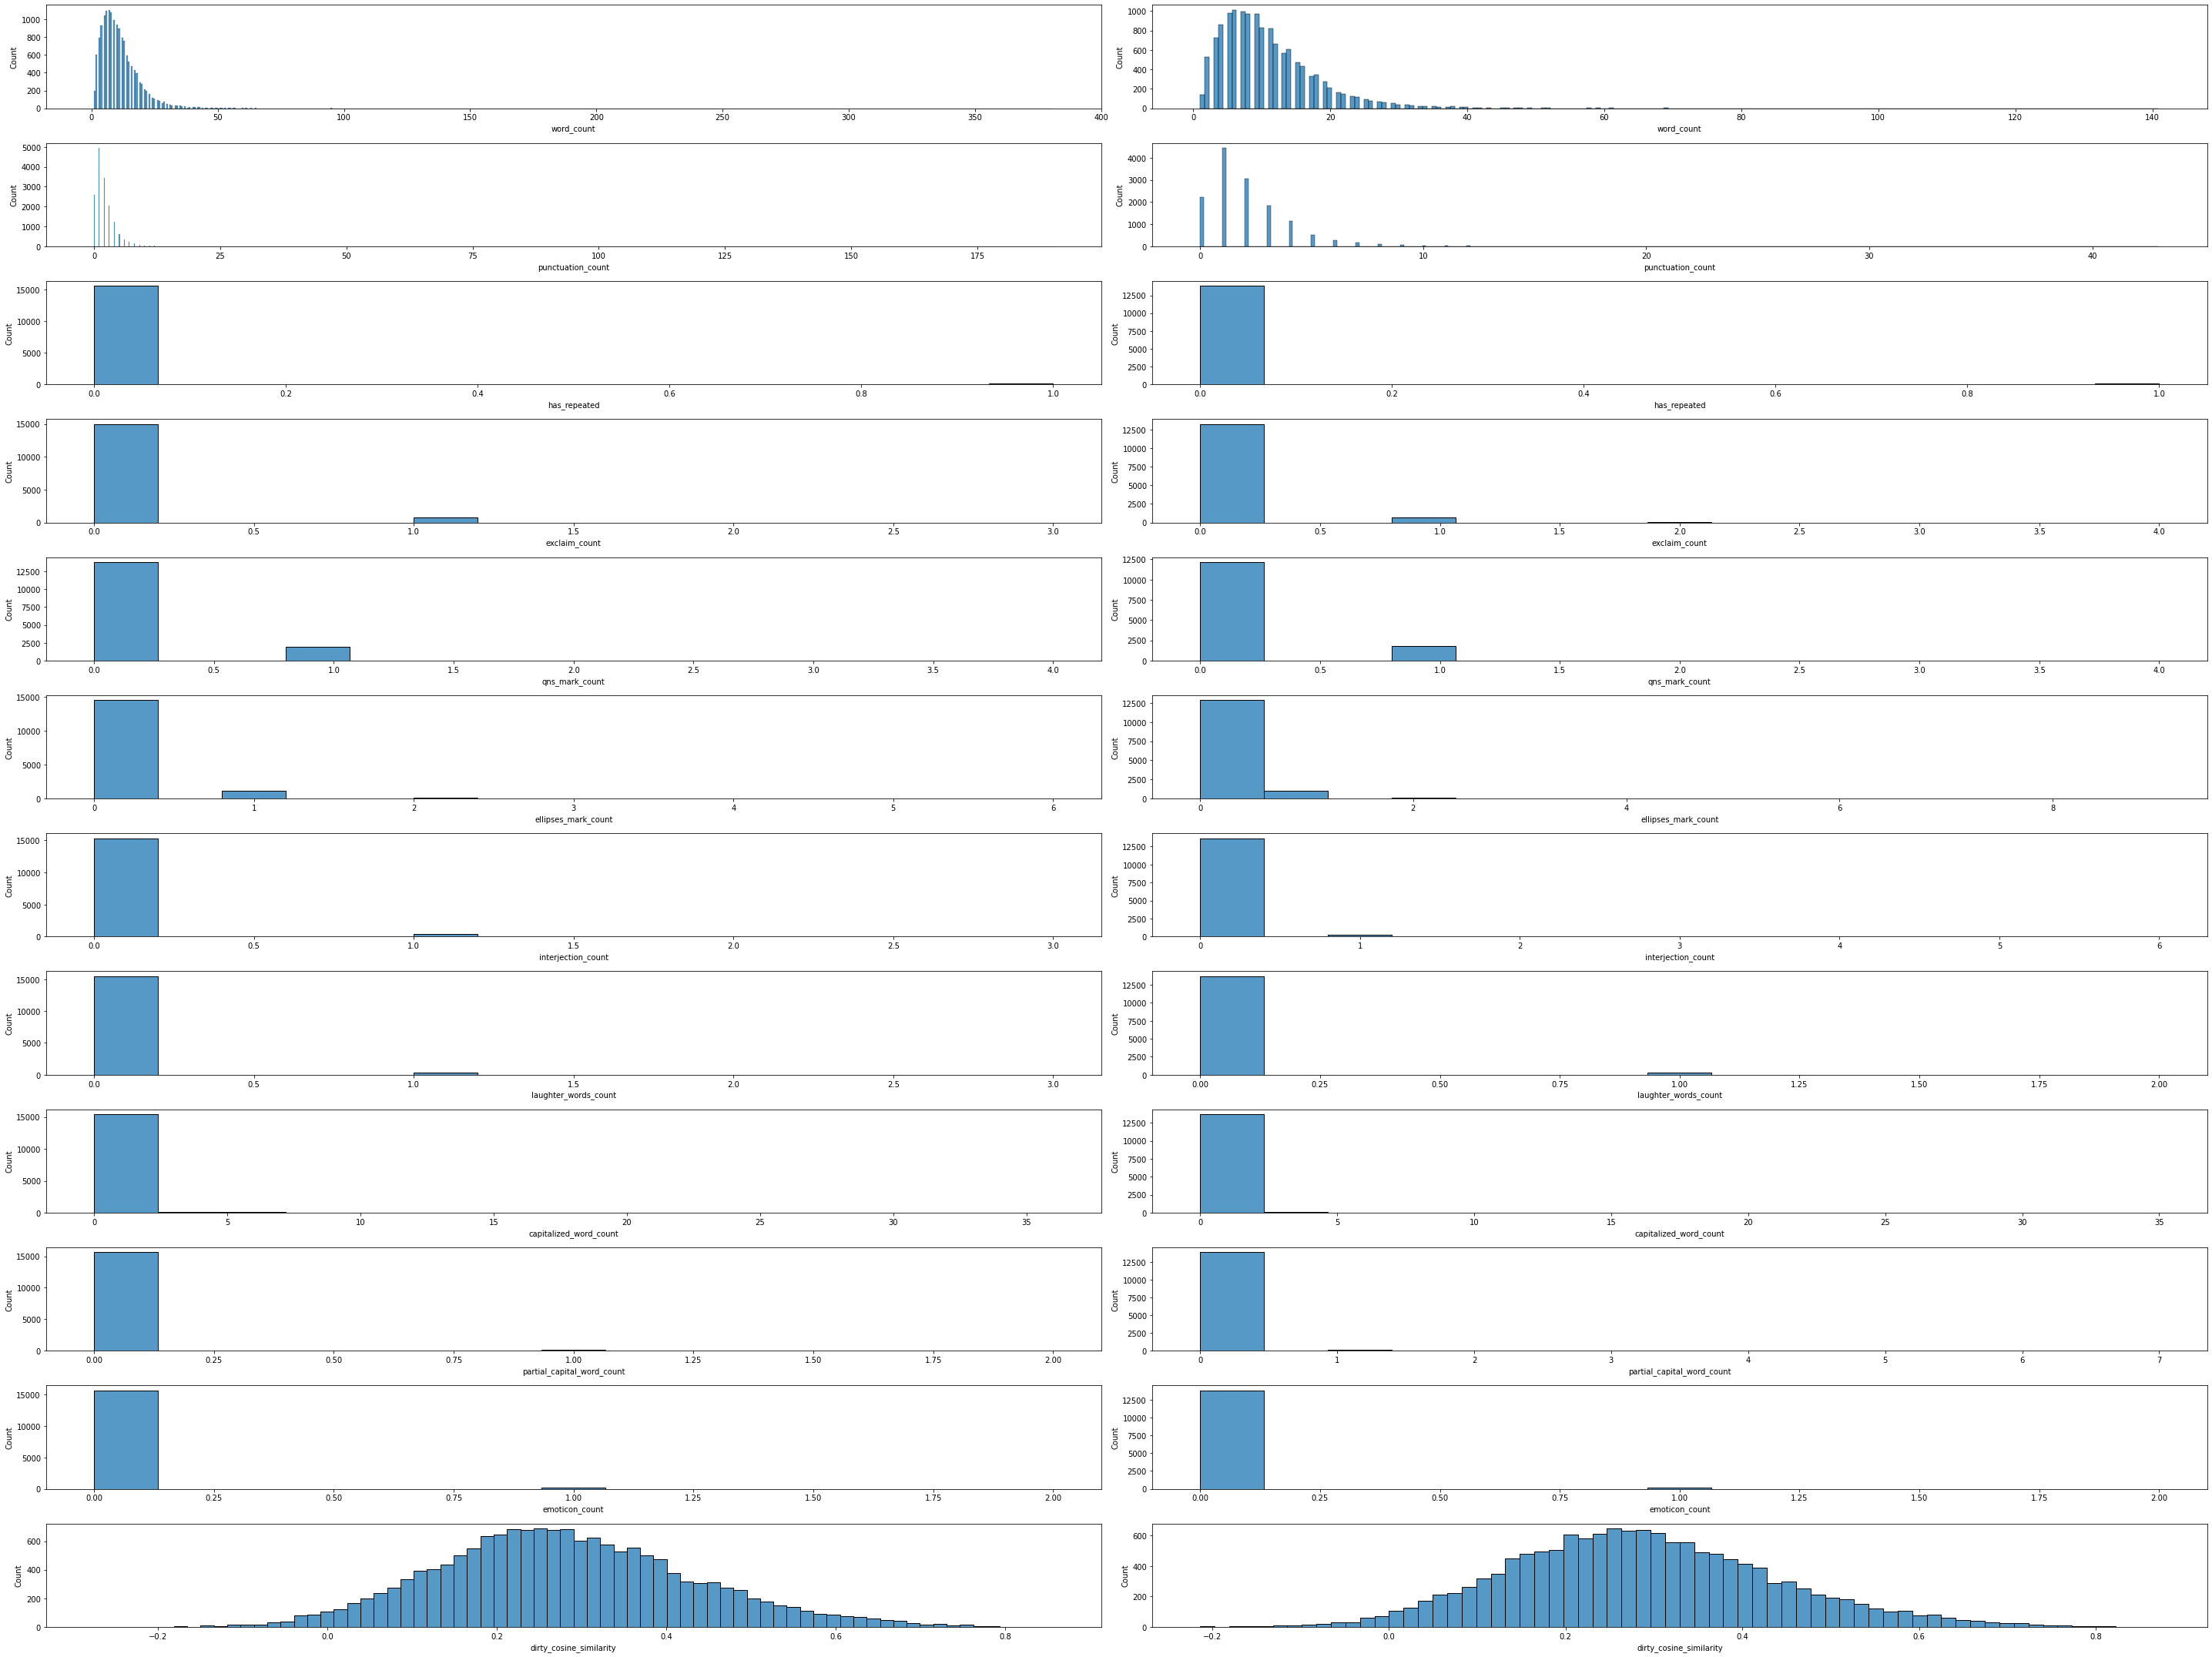

In [ ]:
plt.figure(figsize=(40,30))
k=1
for i in counts:
  plt.subplot(12,2,k)
  sns.histplot(x=hyper_pred_improve[i])
  
  plt.subplot(12,2,k+1)
  sns.histplot(x=hyper_pred_worse[i])
  k+=2
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 200.0)]

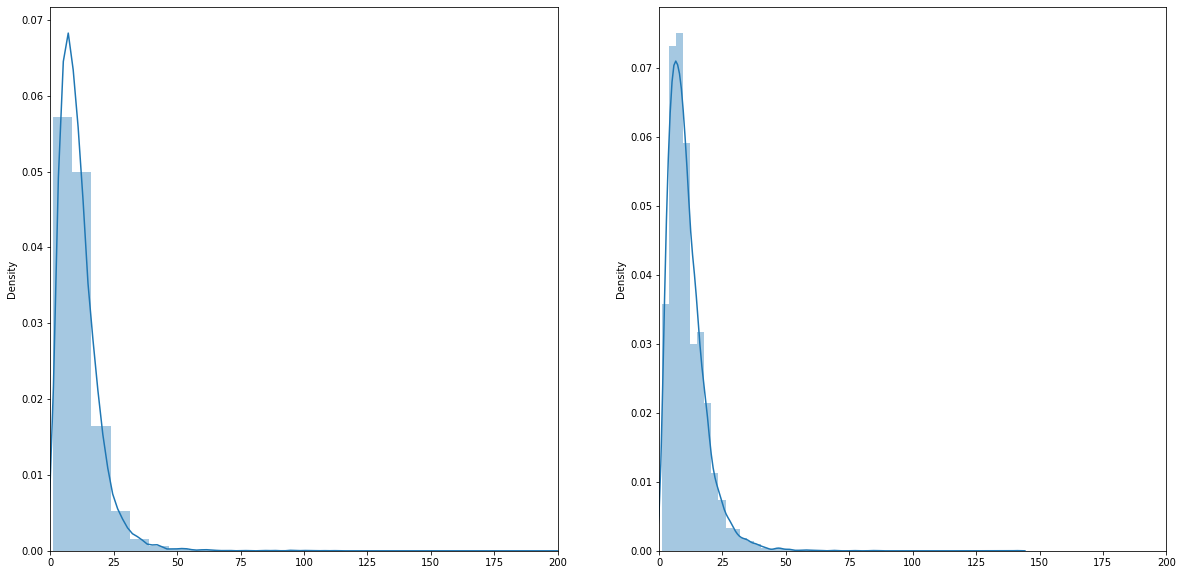

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=200)
a = sns.distplot(ax=axes[0], x=hyper_pred_improve['word_count'])
b = sns.distplot(ax=axes[1], x=hyper_pred_worse['word_count'])
a.set(xlim=(0, 200))

[(0.0, 10.0)]

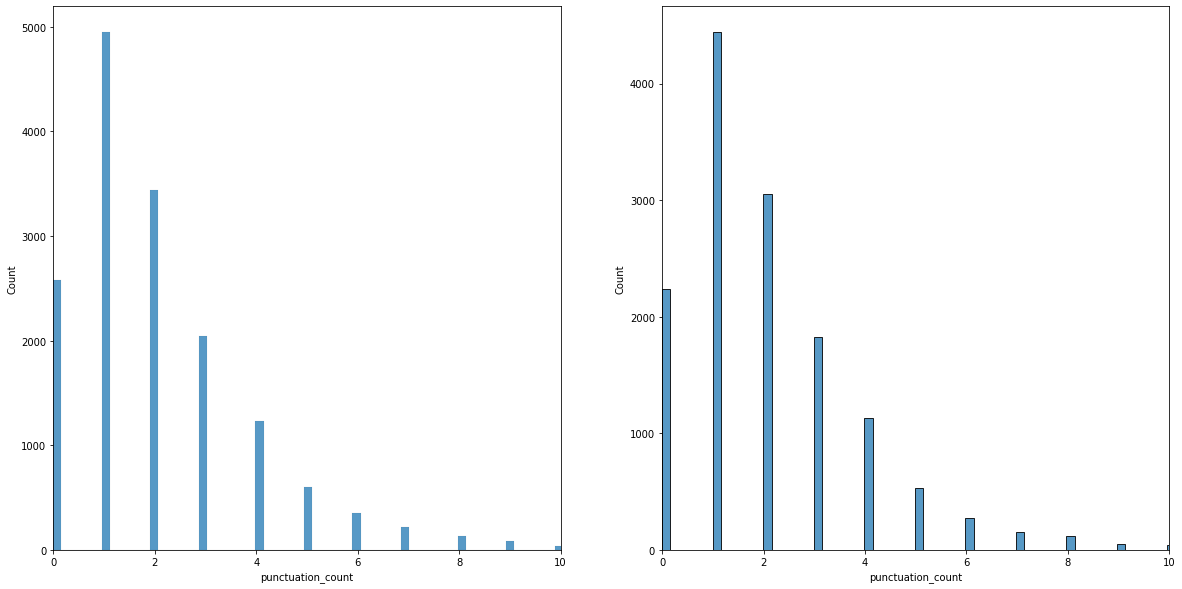

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=10)
a = sns.histplot(ax=axes[0], x=hyper_pred_improve['punctuation_count'])
b = sns.histplot(ax=axes[1], x=hyper_pred_worse['punctuation_count'])
a.set(xlim=(0, 10))

For the right side, for each punctuation count, the density has more variance.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 1.0)]

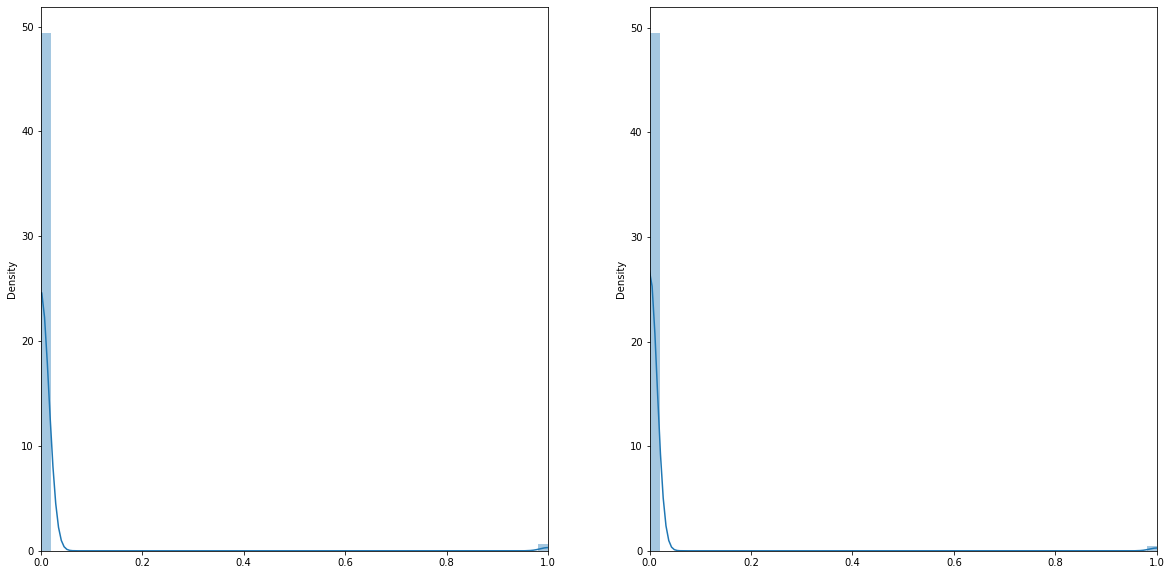

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=1)
a = sns.distplot(ax=axes[0], x=hyper_pred_improve['has_repeated'])
b = sns.distplot(ax=axes[1], x=hyper_pred_worse['has_repeated'])
a.set(xlim=(0, 1))

[(0.0, 2.0)]

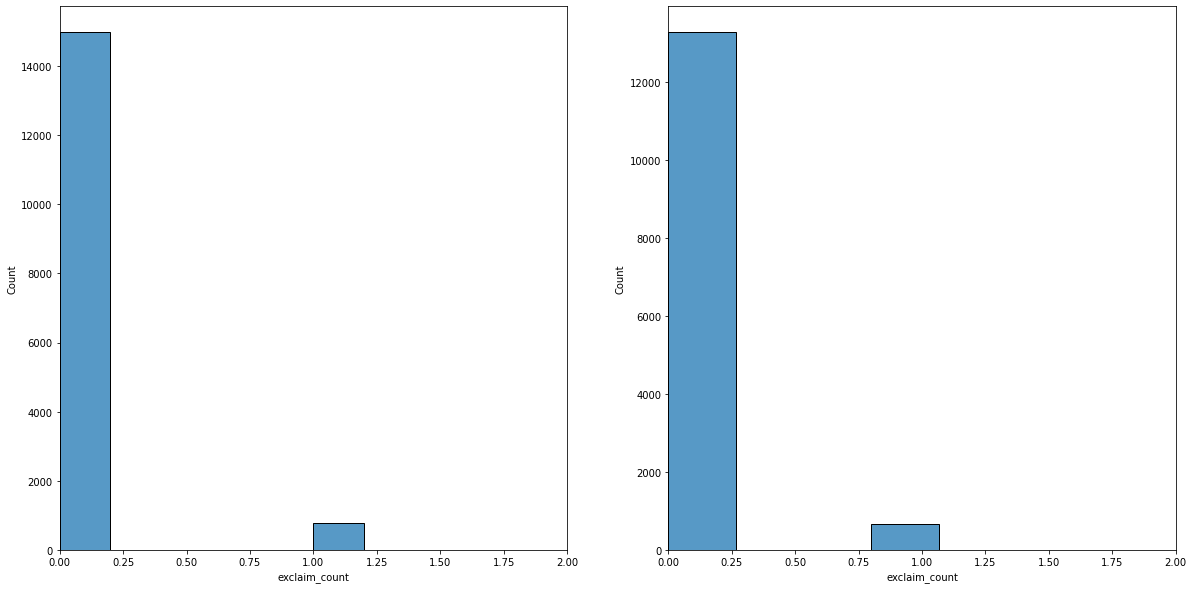

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.histplot(ax=axes[0], x=hyper_pred_improve['exclaim_count'])
b = sns.histplot(ax=axes[1], x=hyper_pred_worse['exclaim_count'])
a.set(xlim=(0, 2))

In [ ]:
sum(hyper_pred_improve['exclaim_count'])

795

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 2.0)]

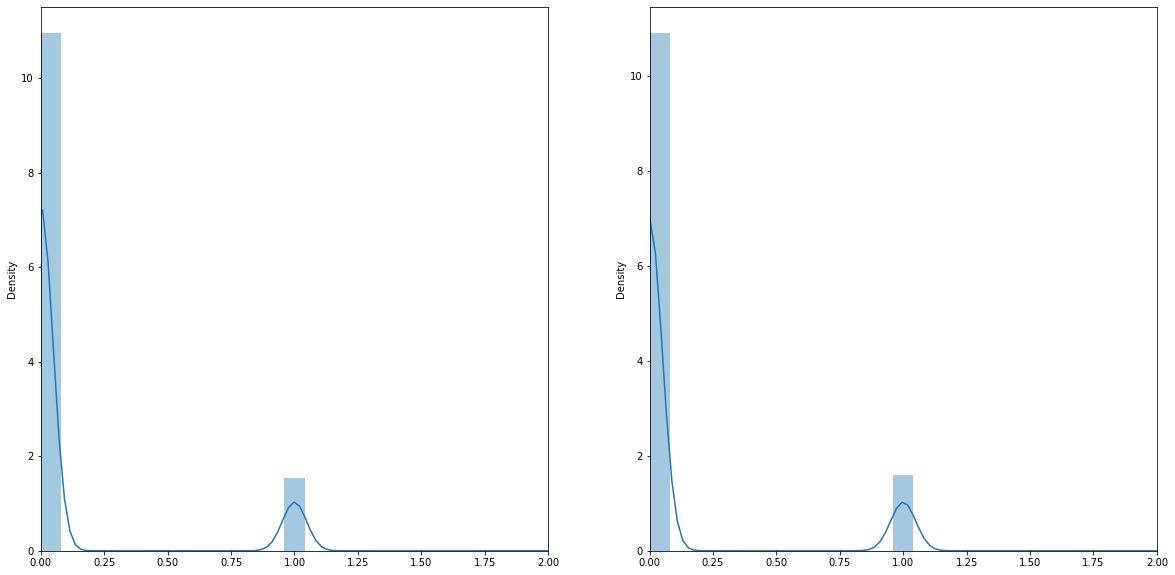

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.distplot(ax=axes[0], x=hyper_pred_improve['qns_mark_count'])
b = sns.distplot(ax=axes[1], x=hyper_pred_worse['qns_mark_count'])
a.set(xlim=(0, 2))

[(0.0, 4.0)]

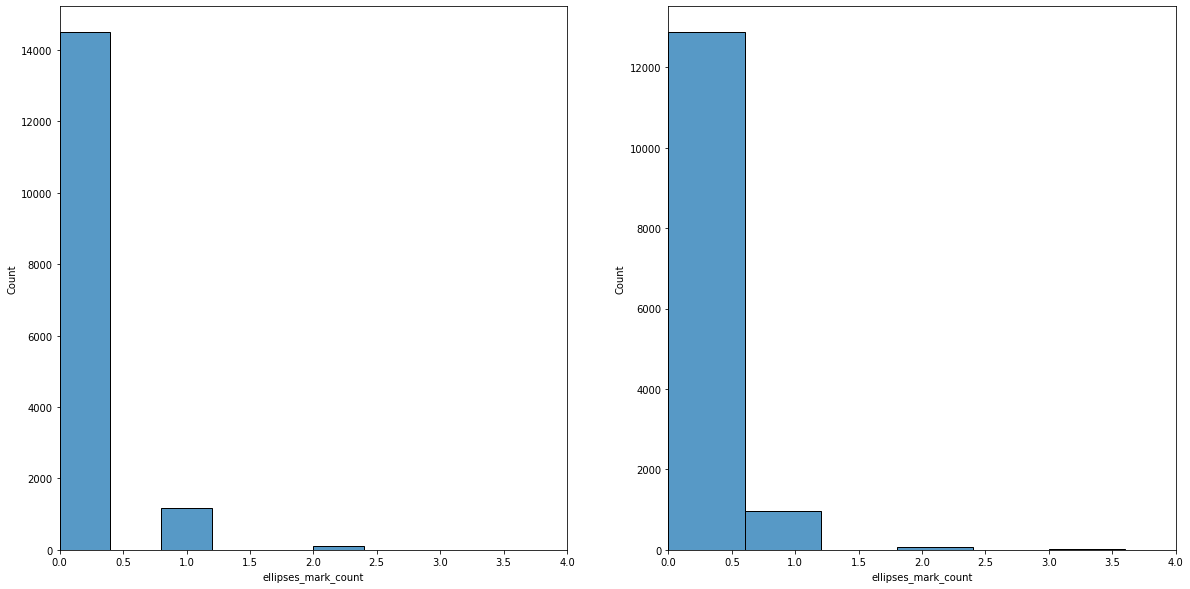

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=4)
a = sns.histplot(ax=axes[0], x=hyper_pred_improve['ellipses_mark_count'])
b = sns.histplot(ax=axes[1], x=hyper_pred_worse['ellipses_mark_count'])
a.set(xlim=(0, 4))

In [ ]:
hyper_pred_improve['ellipses_mark_count'].describe()

count    15773.000000
mean         0.089203
std          0.318654
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: ellipses_mark_count, dtype: float64

[(0.0, 5.0)]

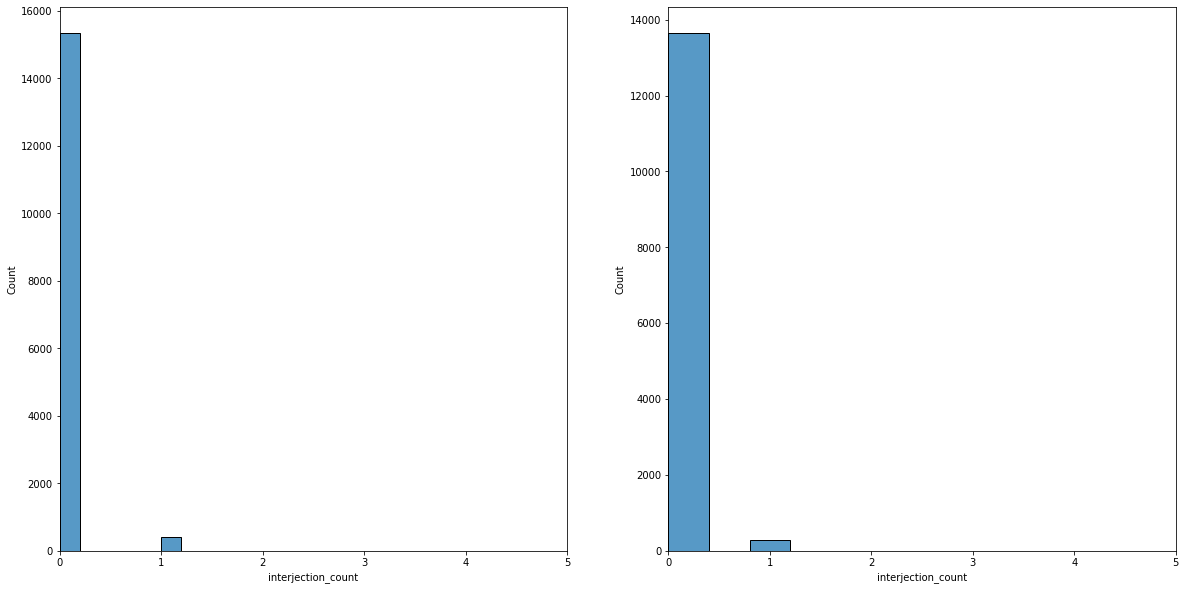

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=5)
a = sns.histplot(ax=axes[0], x=hyper_pred_improve['interjection_count'])
b = sns.histplot(ax=axes[1], x=hyper_pred_worse['interjection_count'])
a.set(xlim=(0, 5))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 2.0)]

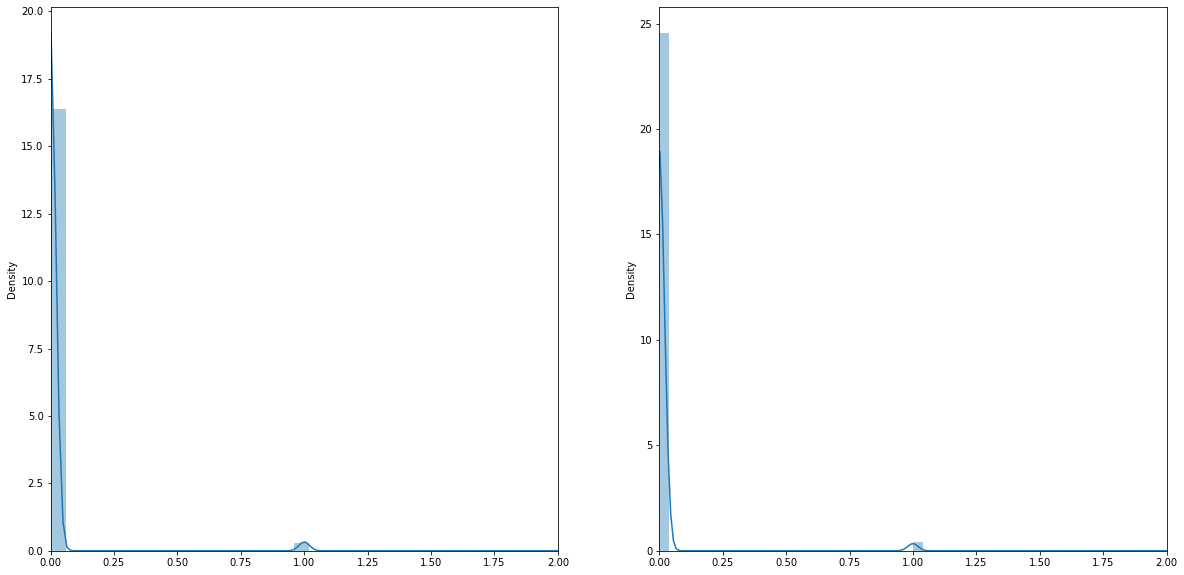

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.distplot(ax=axes[0], x=hyper_pred_improve['laughter_words_count'])
b = sns.distplot(ax=axes[1], x=hyper_pred_worse['laughter_words_count'])
a.set(xlim=(0, 2))

[(0.0, 10.0)]

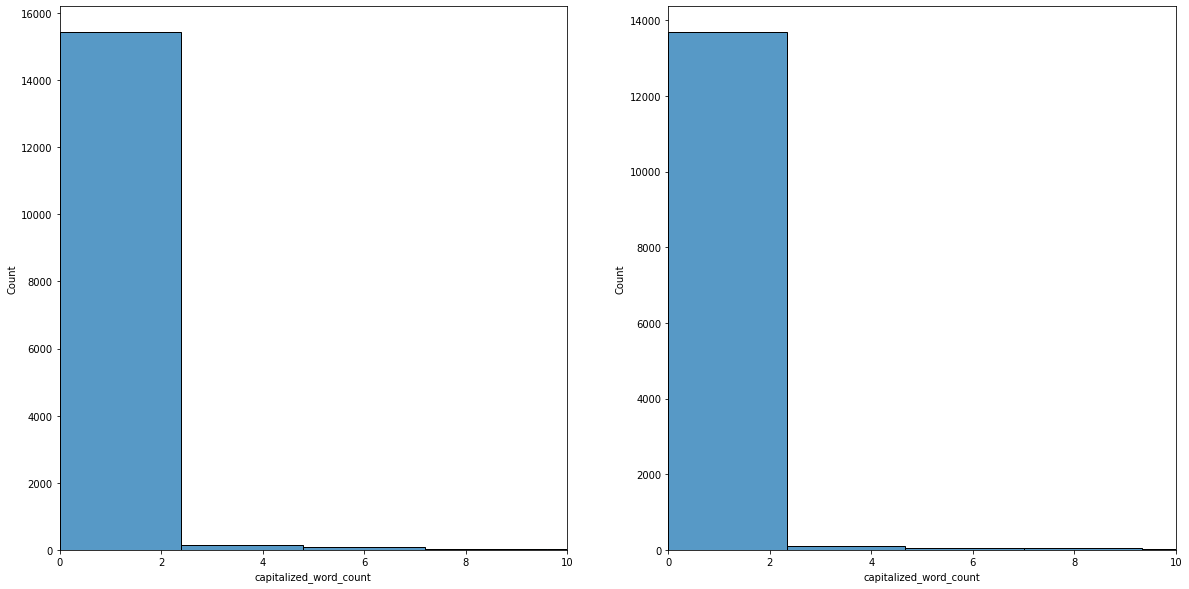

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=10)
a = sns.histplot(ax=axes[0], x=hyper_pred_improve['capitalized_word_count'])
b = sns.histplot(ax=axes[1], x=hyper_pred_worse['capitalized_word_count'])
a.set(xlim=(0, 10))

(0.0, 10.0)

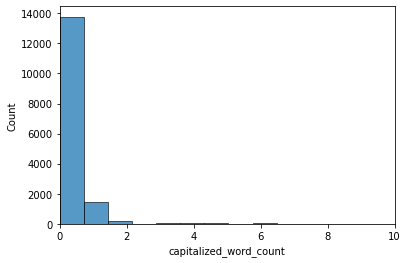

In [ ]:
sns.histplot(hyper_pred_improve['capitalized_word_count'],bins=50)
plt.xlim(0,10)

After hyperparameter tuning, the model can predict comments without capitalized words better.

In [ ]:
hyper_pred_improve['capitalized_word_count'].describe()

count    15773.000000
mean         0.282635
std          1.404903
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         36.000000
Name: capitalized_word_count, dtype: float64

In [ ]:
hyper_pred_worse['capitalized_word_count'].describe()

count    13954.000000
mean         0.262505
std          1.327140
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         35.000000
Name: capitalized_word_count, dtype: float64

[(0.0, 2.0)]

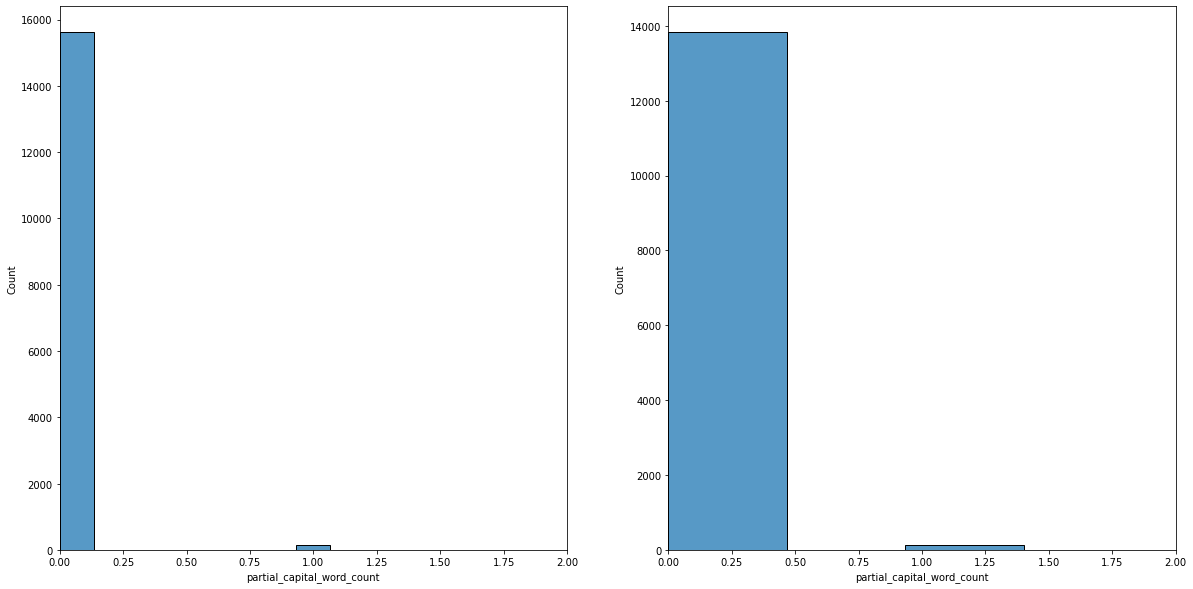

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.histplot(ax=axes[0], x=hyper_pred_improve['partial_capital_word_count'])
b = sns.histplot(ax=axes[1], x=hyper_pred_worse['partial_capital_word_count'])
a.set(xlim=(0, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 2.0)]

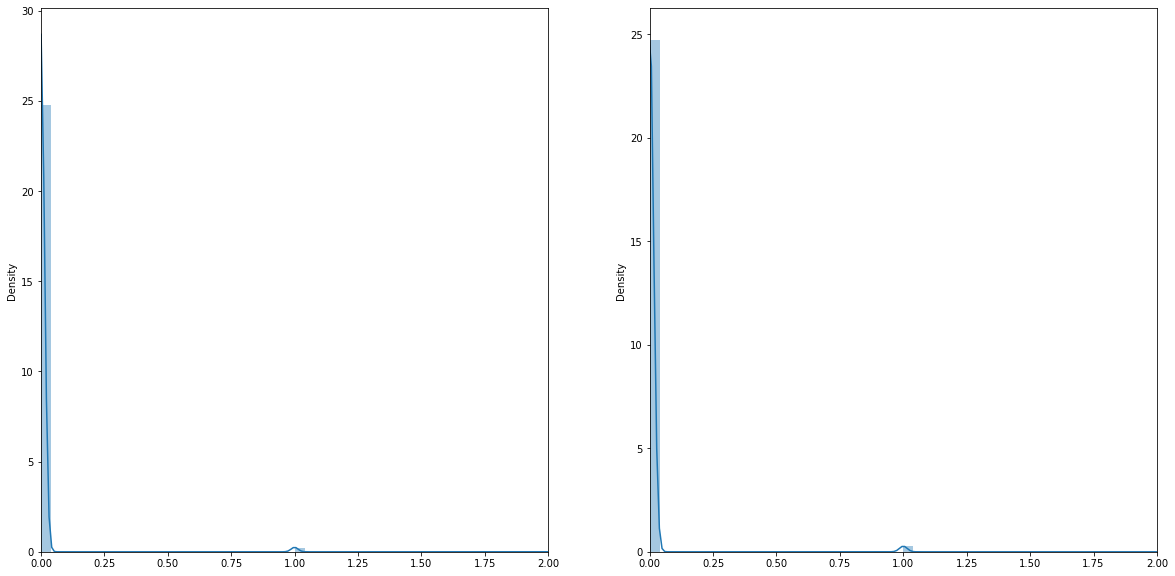

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.distplot(ax=axes[0], x=hyper_pred_improve['emoticon_count'])
b = sns.distplot(ax=axes[1], x=hyper_pred_worse['emoticon_count'])
a.set(xlim=(0, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


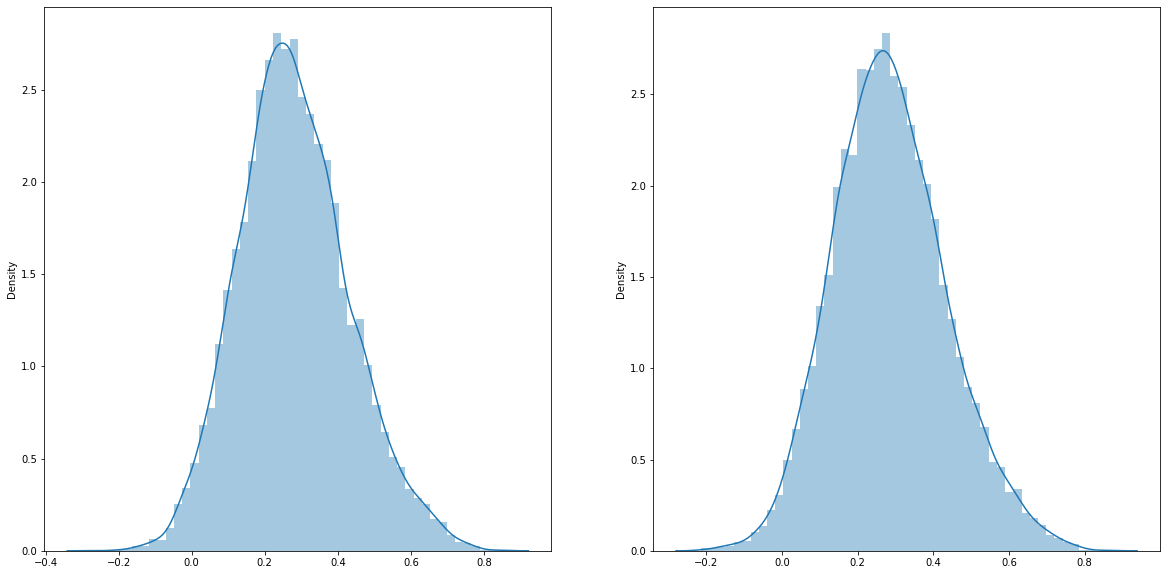

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
a = sns.distplot(ax=axes[0], x=hyper_pred_improve['dirty_cosine_similarity'])
b = sns.distplot(ax=axes[1], x=hyper_pred_worse['dirty_cosine_similarity'])

After hyperparameter tuning, the model predicts comment that are more different than parent comments better.

In [ ]:
hyper_pred_worse['partial_capital_word_count'].describe()

count    13954.000000
mean         0.009460
std          0.111912
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: partial_capital_word_count, dtype: float64

In [ ]:
test_data[test_data.index == 337446]

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,lemmatized_comment,lemmatized_parent_comment,clean_comment,clean_parent_comment,lemmatized_clean_comment,lemmatized_clean_parent_comment,vectorized_comment,vectorized_clean_comment,vectorized_parent_comment,vectorized_clean_parent_comment,dirty_cosine_similarity,clean_cosine_similarity,word_count,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count,partial_capital_word_count,emoticon_count,sentiment,base_pred,feature_pred,hyper_pred
337446,1,Let's just skip the Jill stein farce and elect Trump!,bruceholder84,jillstein,1.0,1.0,0.0,2016-07,25/7/16 18:12,"Why we have to rally behind Jill stein now more than ever before (X-post from Kossacks) Here is my prediction of what is going to happen this week... Bernie Sanders' private address of the delegates will be something like this: Yes, DNC leak was bad. But we got rid of DWS and that's a victory and now things can start to become a lot better. We have gotten victories on the platform. We have to fill political positions and work from the bottom up. Hillary Clinton must win because Trump is very bad. Don't disrupt the convention and support Hillary. Then tonight he will hold his speech we all have heard and he will once again stress that Clinton simply must win. The Bernie delegates will likely feel torn and under a lot of pressure. On the one hand they are there for Bernie and would like to see him be the nominee but they will be told he won't be. They don't want to disrespect Bernie but they also don't want to disappoint the people whose voices they are carrying. At the end of the convention Hillary will be the Democratic nominee and her speech will probably be the low point of the convention but the media will celebrate her like a queen. They expect the national polling to dramatically change after the convention, thinking Hillary will have a landslide victory in the fall. However, outside more and more people are rising up against Hillary. More and more people will say ""Fuck it"" (or, ""Fuck her""). More revelations will come from Wikileaks that will further derail her chances of winning against Trump. The only scenario in which she can win is if a very large number of people who are now vehemently against her will miraculously turn around and vote for her. But how likely is that? And what happens if some material will be so damaging that she has to step down before the general election? If we believe the hints of Wikileaks and Kim Dotcom it's a possible scenario. It already is a four way race this year. In this four way race Hillary's chances are not good, but Trump's increase steadily. And if we truly don't want Trump, and if we don't get Bernie, then I believe we have to get behind Jill Stein with everything we have. We have to get her in the debates, we have to get her into the polls and we have to make sure as many people as possible will get to know her and what she stands for. I truly believe this messy election year is going to get much, much worse. And Bernie has started something that seemed impossible in the beginning. I believe Jill can too. I know, to some it seems ridiculous that I even believe she has a chance. But I really do. I seriously believe that if we put our weight behind her, we can make something historic happen. We can have the RIGHT woman in the White House, we can have the end of the two party dictatorship, we can have a voice again. Yes, Bernie started this. And I will be forever grateful that he did. But if he's not going to fight what we would like to fight for, even after the revelations of how the DNC made sure our money wouldn't go anywhere ever, then we have to do it ourselves. It was him to said ""Never lose your sense of outrage!"" And the only reasonable response to the DNC leaks is outrage. Thousands of people who have given their last cent, their rent money to Bernie, in 

In [ ]:
pd.set_option('display.max_colwidth',None)
feature_pred_improve.sample(n=10)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,lemmatized_comment,lemmatized_parent_comment,clean_comment,clean_parent_comment,lemmatized_clean_comment,lemmatized_clean_parent_comment,vectorized_comment,vectorized_clean_comment,vectorized_parent_comment,vectorized_clean_parent_comment,dirty_cosine_similarity,clean_cosine_similarity,word_count,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count,partial_capital_word_count,emoticon_count,sentiment,base_pred,feature_pred,hyper_pred
442666,0,Falstad should be invulnerable in flight.,a3udi,heroesofthestorm,7.0,7.0,0.0,2016-02,27/2/16 18:18,Abathur's bombs make a nice runway,Falstad invulnerable flight .,Abathur 's bomb make nice runway,Falstad should be invulnerable in flight,Abathurs bombs make a nice runway,Falstad invulnerable flight,Abathurs bomb make nice runway,"[-0.13573527, -0.18163694, 0.4710015, 0.8370931, 0.029208185, -0.075874604, 0.1779355, -0.36235508, 0.35384697, -0.10064475, 0.38032937, -0.2699823, -0.06755435, -0.07949732, 0.46533507, 0.066900045, 0.2556598, -0.052328605, -0.087873116, -0.3002828, 0.05275116, 0.059333056, -0.05319899, 0.26727262, 0.28507167, 0.12639277, -0.36298525, 0.019337183, -0.15086797, 0.14192718, -0.18711583, 0.14611006, 0.06420435, 0.21141893, 0.29247928, 0.26133657, -0.20680311, 0.22607522, 0.022691933, 0.52666163, -0.66323936, -0.35116062, 0.24420422, -0.020255718, -0.5570569, 0.11562076, -0.48316574, 0.19259496, -0.10305375, -0.13331988, 0.38861996, -0.09429212, 0.5591862, 0.23130098, -0.028091231, 0.029943151, 0.039403055, 0.52568907, 0.23524772, -0.34950474, -0.13191277, 0.33969718, -0.2081177, -0.03729332, 0.10823523, 0.102221996, 0.4975835, 0.28918836, -0.31493804, 0.27285793, 0.23171924, -0.34539402, -0.102717236, 0.52205557, -0.44186896, 0.12304854, -0.12965807, 0.15325733, -0.20446967, 0.00856946, 0.26156718, -0.023427438, -0.35203058, -0.022188002, 0.08903934, -0.45781076, -0.022094589, 0.02228432, 0.22750841, 0.1711376, -0.19950987, 0.006847825, 0.14786395, 0.530794, -0.007849207, -0.21670121, 0.5140065, 0.0054110894, 0.21601257, 0.5909856]","[-0.037792705, -0.13939662, 0.44299763, 0.818707, -0.08346769, -0.019668063, 0.14196132, -0.44068483, 0.024113646, 0.03572954, 0.28554934, -0.032063648, -0.048774116, -0.012186028, 0.45011404, 0.09246465, 0.17654033, 0.10568871, -0.064807504, -0.40330276, -0.07944462, 0.0076045822, -0.14830077, 0.2598954, 0.22397134, 0.035152096, -0.36970213, -0.078204684, -0.018398082, 0.19418645, -0.013021461, 0.116405316, -0.23546465, 0.015104482, 0.34654382, 0.22661968, -0.21025662, 0.06405851, -0.15798537, 0.5494614, -0.56154597, -0.14316717, 0.2722025, -0.024162069, -0.42601275, 0.19700715, -0.28436545, 0.30050874, -0.12558804, -0.02899187, 0.44480017, -0.2903148, 0.46323618, 0.21124701, -0.17809893, 0.10097773, 0.059298348, 0.45490354, 0.22183953, -0.42192158, -0.19960925, 0.5447283, -0.288296, -0.012600699, 0.005878498, 0.09250904, 0.56692374, 0.4517428, -0.37666962, 0.3242623, 0.34191564, -0.16989228, -0.26670638, 0.4935363, -0.3593346, -0.124690965, -0.24845833, 0.26332292, 0.013890803, -0.033326797, 0.29450402, -0.06051958, -0.4045565, -0.05140087, 0.112802476, -0.3957816, -0.012252887, -0.01488938, 0.15077129, 0.041276433, -0.120156735, 0.28657115, 0.14710654, 0.4317578, 0.25173178, -0.29956505, 0.25305626, -0.018462636, 0.14545344, 0.4904694]","[0.13171051, 0.13853173, -0.21045937, 0.52094805, -0.13676265, -0.57816935, 0.3170467, 0.7391578, -0.1959754, -0.6839259, 0.55879146, -0.49714708, 0.09811067, -0.21355659, 0.38502306, 0.48868024, 0.15194137, -0.14643528, 0.053324714, -0.04728026, 0.34927344, 0.54104173, 0.23864841, 0.3150409, 0.50912094, -0.26062903, 0.45684543, 0.27243793, 0.4461028, -0.09538321, 0.3370954, -0.30003133, -0.27128237, -0.5040059, -0.047001187, -0.11672406, -0.48532668, -0.3529413, 0.59055966, 0.5084667, 0.3213629, 0.41582754, 0.10114371, -0.18151239, 

In [ ]:
pd.set_option('display.max_colwidth',None)
feature_pred_worse.sample(n=10)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,lemmatized_comment,lemmatized_parent_comment,clean_comment,clean_parent_comment,lemmatized_clean_comment,lemmatized_clean_parent_comment,vectorized_comment,vectorized_clean_comment,vectorized_parent_comment,vectorized_clean_parent_comment,dirty_cosine_similarity,clean_cosine_similarity,word_count,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count,partial_capital_word_count,emoticon_count,sentiment,base_pred,feature_pred,hyper_pred
689326,0,"if you press a button while recovering from v.attack it wont register, you have to wait till the animation is completly finished, maybe thats your problem.",Im_Heartless,bloodborne,1.0,1.0,0.0,2015-06,7/6/15 6:43,"Does this game have a rare bug where your character doesn't heal despite pressing the button? After putting about 75 hours into the game, I've finally become convinced there is a bug which causes your character to not heal sometimes despite hitting the healing button. I've experienced this actually quite a few times, but it's still very rare in general and it's totally unclear to me what causes it to happen. I finally decided it must be a bug when it happened repeatedly in the blood-starved beast fight in the Ailing Loran chalice dungeon. I know Dark Souls had a rather insidious bug which basically was the exact same thing: you'd tell your character to heal and it wouldn't happen. There used to be an absolutely hilarious video on YouTube of a guy dying to a Black Knight due to this and getting extremely mad about it, but I couldn't find it. It was a rare piece of video proof that the bug existed in Dark Souls. I assume the same bug has basically resurfaced in Bloodborne somehow. Has anyone else experienced this? It's definitely not common, but when it happens it can really fuck you over. Dark Souls also had a similar bug where a roll would incorrectly get queued up and executed like 5 seconds after you hit the button, often causing people to roll off cliffs unexpectedly.","press button recover v.attack wont register , wait till animation completly finish , maybe thats problem .","Does game rare bug character n't heal despite press button ? After put 75 hour game , I 've finally become convinced bug cause character heal sometimes despite hit heal button . I 've experience actually quite time , 's still rare general 's totally unclear cause happen . I finally decide must bug happen repeatedly blood-starved beast fight Ailing Loran chalice dungeon . I know Dark Souls rather insidious bug basically exact thing : 'd tell character heal would n't happen . There use absolutely hilarious video YouTube guy die Black Knight due get extremely mad , I could n't find . It rare piece video proof bug exist Dark Souls . I assume bug basically resurface Bloodborne somehow . Has anyone else experience ? It 's definitely common , happen really fuck . Dark Souls also similar bug roll would incorrectly get queued execute like 5 second hit button , often cause people roll cliff unexpectedly .",if you press a button while recovering from vattack it wont register you have to wait till the animation is completly finished maybe thats your problem,Does this game have a rare bug where your character doesnt heal despite pressing the button After putting about 75 hours into the game Ive finally become convinced there is a bug which causes your character to not heal sometimes despite hitting the healing button Ive experienced this actually quite a few times but its still very rare in general and its totally unclear to me what causes it to happen I finally decided it must be a bug when it happened repeatedly in the bloodstarved beast fight in the Ailing Loran chalice dungeon I know Dark Souls had a rather insidious bug which basically was the exact same thing youd tell your character to heal and it wouldnt happen There used to be an absolutely